# About agglomerative clustering 
### Code: To generate bitstring dictionary for EYYK data + Need help for rdd part

# How to save the cluster code down so I can just read whenever I need it? 

In [ ]:
# get codes for the words
cluster_dict = clustering.codes()
# {'an': '110', 'ano ther': '111', 'This': '00', 'example': '01', 'is': '10'}

In [ ]:
type(cluster_dict)

In [ ]:
import json

with open('bitstring_dictionary.txt', 'w') as convert_file:
     convert_file.write(json.dumps(cluster_dict))

In [ ]:
# importing the module
import json
  
# reading the data from the file
with open('bitstring_dictionary.txt') as f:
    data = f.read()

print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
js = json.loads(data)
  
print("Data type after reconstruction : ", type(js))
print(js)

## Agglomerative Clustering (Clustering)

Same idea with word embeddings, where we are gonna map word(token) that human understand into a n-dimensional vector space contain vectors that machine are able to understand. When a vector space is form, similar contexts will appear in same area of the vector space. 

### k-mean clustering 
K-means assigns k random points in the vector space as initial, virtual means of the k clusters. It then assigns each data point to the nearest cluster mean. Next, the actual mean of each cluster is recalculated. Based on the shift of the means the data points are reassigned. This process repeats itself until the means of the clusters stop moving around.


### Brown clustering = hierarchical clustering 
This method relies on distribution hypothesis. 
Introduces a quality function describing how well surrounding context words predict the occurrence of the wors in the current cluster, which is known as mutual information. 


# Following Kaggle live stream
https://www.youtube.com/watch?v=NL3U8QOGBaE

In [31]:
import pandas as pd 

In [32]:
df = pd.read_csv("manuallyTagging.csv")
df.head()

,f,Pos Tag
0,"In a webinar last week, Capital Economics' glo...","[\n(""In"", ""ADP""), \n(""a"", ""DET""), \n(""webinar""..."
1,I think that's not an official unbox therapy a...,"[\n(""I"", ""PRON""), \n(""think"", ""VERB""), \n(""tha..."
2,"Goooood, very soft !","[\n(""Goooood"", ""ADJ""), \n("","", ""PUNCT""), \n(""v..."
3,nice to wear Can repeat order next time,"[\n(""!"", ""PUNCT""), \n(""nice"", ""ADJ""), \n(""to"",..."
4,"item with nice packing, good quality product, ...","[\n(""item"", ""NOUN""), \n(""with"", ""ADP""), \n(""ni..."


In [33]:
s_df = df.f[:20].tolist()

In [34]:
s_df[:10]

["In a webinar last week, Capital Economics' global economists lumped together the Philippines, Thailand, Mexico, and Southern Europe among the economies which would most likely experience permanent loss of output from their respective domestic tourism sectors due to the pandemic.",
 "I think that's not an official unbox therapy account",
 'Goooood, very soft !',
 'nice to wear Can repeat order next time',
 'item with nice packing, good quality product, good value for money,Excellent service by seller.',
 "I can't search anymore Jollibee store near me I had ordered last week but now???",
 'Fast delivery, good packing, good value product. Excellent service',
 'Not try yet.',
 'But looks like just nice.',
 'Suitable with my skin.']

In [35]:
from nltk import word_tokenize
word_tokenize(s_df[1])

['I',
 'think',
 'that',
 "'s",
 'not',
 'an',
 'official',
 'unbox',
 'therapy',
 'account']

In [40]:
df['f'] = df['f'].astype(str)
txt = df.f.tolist()

In [41]:
data = [word_tokenize(i) for i in txt]

In [83]:
data

[['In',
  'a',
  'webinar',
  'last',
  'week',
  ',',
  'Capital',
  'Economics',
  "'",
  'global',
  'economists',
  'lumped',
  'together',
  'the',
  'Philippines',
  ',',
  'Thailand',
  ',',
  'Mexico',
  ',',
  'and',
  'Southern',
  'Europe',
  'among',
  'the',
  'economies',
  'which',
  'would',
  'most',
  'likely',
  'experience',
  'permanent',
  'loss',
  'of',
  'output',
  'from',
  'their',
  'respective',
  'domestic',
  'tourism',
  'sectors',
  'due',
  'to',
  'the',
  'pandemic',
  '.'],
 ['I',
  'think',
  'that',
  "'s",
  'not',
  'an',
  'official',
  'unbox',
  'therapy',
  'account'],
 ['Goooood', ',', 'very', 'soft', '!'],
 ['nice', 'to', 'wear', 'Can', 'repeat', 'order', 'next', 'time'],
 ['item',
  'with',
  'nice',
  'packing',
  ',',
  'good',
  'quality',
  'product',
  ',',
  'good',
  'value',
  'for',
  'money',
  ',',
  'Excellent',
  'service',
  'by',
  'seller',
  '.'],
 ['I',
  'ca',
  "n't",
  'search',
  'anymore',
  'Jollibee',
  'store',


In [42]:
from brown_clustering import *

In [46]:
# create a corpus
corpus_data = BigramCorpus(data, alpha=0.5, min_count=0)
clustering = BrownClustering(corpus_data, 17)
clustering.train()

100%|██████████████████████████████████████| 3031/3031 [00:03<00:00, 879.31it/s]


[['.'],
 [','],
 ['good'],
 ['!'],
 ['..', 'for', 'and'],
 ['$',
  'it',
  'service',
  'Good',
  'I',
  'to',
  'The',
  'nice',
  ':',
  'of',
  'product',
  'ok',
  'tq',
  'cantik',
  'packaging',
  'repeat',
  'again',
  'received',
  'by',
  'with',
  'Thanks',
  'suka',
  'this',
  'order',
  'are',
  'excellent',
  'sampai',
  'Nice',
  'Very',
  'as',
  'buy',
  'gift',
  'la',
  'much',
  'thanks',
  '&',
  'my',
  'free',
  'from',
  'Tq',
  'n',
  'okay',
  'packing',
  'size',
  'Received',
  'cheap',
  'goods',
  'i',
  'time',
  'will',
  'Will',
  'beli',
  'but',
  'dah',
  'harga',
  'love',
  'on',
  'price',
  'saya',
  'sgt',
  'terbaik',
  'was',
  '?',
  'Bagus',
  'Food',
  'kain',
  'semua',
  'that',
  'at',
  'cute',
  'have',
  'me',
  'murah',
  "n't",
  "'s",
  'Seller',
  'dengan',
  'not',
  'recommended',
  'worth',
  'yg',
  'Terbaik',
  'arrived',
  'buying',
  'can',
  'dgn',
  'laju',
  'like',
  'sangat',
  'tak',
  'well',
  'Cantik',
  'Delivery'

In [47]:
clustering.vocabulary

{'In': 2,
 'a': 28,
 'webinar': 1,
 'last': 4,
 'week': 2,
 ',': 307,
 'Capital': 1,
 'Economics': 1,
 "'": 3,
 'global': 1,
 'economists': 1,
 'lumped': 1,
 'together': 1,
 'the': 112,
 'Philippines': 1,
 'Thailand': 1,
 'Mexico': 1,
 'and': 121,
 'Southern': 1,
 'Europe': 1,
 'among': 1,
 'economies': 1,
 'which': 5,
 'would': 3,
 'most': 2,
 'likely': 1,
 'experience': 2,
 'permanent': 1,
 'loss': 1,
 'of': 32,
 'output': 1,
 'from': 16,
 'their': 2,
 'respective': 1,
 'domestic': 1,
 'tourism': 1,
 'sectors': 1,
 'due': 1,
 'to': 50,
 'pandemic': 1,
 '.': 324,
 'I': 54,
 'think': 2,
 'that': 12,
 "'s": 10,
 'not': 10,
 'an': 2,
 'official': 1,
 'unbox': 1,
 'therapy': 1,
 'account': 1,
 'Goooood': 1,
 'very': 42,
 'soft': 2,
 '!': 174,
 'nice': 42,
 'wear': 1,
 'Can': 1,
 'repeat': 26,
 'order': 20,
 'next': 6,
 'time': 14,
 'item': 5,
 'with': 23,
 'packing': 15,
 'good': 260,
 'quality': 41,
 'product': 32,
 'value': 29,
 'for': 72,
 'money': 33,
 'Excellent': 8,
 'service': 45,


In [48]:
clustering.get_similar('the')

[('``', '00101001'),
 ('(', '0010101'),
 ('fast', '0010110'),
 ('Fast', '0010111'),
 ('is', '0010010100'),
 ('in', '0010010101'),
 ('..', '00100000'),
 ('for', '00100001'),
 ('very', '001001011'),
 ('and', '0010001')]

# WORKING ON BROWN CLUSTERING

# brown-clustering library

- Officially from https://pypi.org/project/brown-clustering/

- Slides for theory explanation http://aritter.github.io/courses/5525_slides/brown.pdf 

## Resources for semi-supervised thingy
- https://cs.stanford.edu/~pliang/papers/meng-thesis.pdf (Semi-Supervised Learning for Natural Language)
- 

In [50]:
import os 
os.getcwd()
os.chdir('/home/pc8/MELEX/winnie-here')

In [51]:
import pandas as pd
import ast
from ast import literal_eval

def convert_string2_list(text):
    return ast.literal_eval(str(text))

data = pd.read_csv("train_latest.csv")
data = data["tagged"].apply(convert_string2_list)

def converttuplelisttosentencelist(listoftuples):
    training_data = []
    sentences = []
    for each_sentences in listoftuples: 
        observation_list = []
        label_list = []
        for i in each_sentences:
            observation = i[0]
            observation_list.append(observation)
            label = i[1]
            label_list.append(label)
        sentence_list = [observation_list,label_list]
        training_data.append(sentence_list)
        sentences.append(observation_list)
    return training_data,sentences

_, sentences = converttuplelisttosentencelist(data)

In [52]:
sentences

[['In',
  'a',
  'webinar',
  'last',
  'week',
  ',',
  'Capital',
  'Economics',
  "\\'",
  'global',
  'economists',
  'lumped',
  'together',
  'the',
  'Philippines',
  ',',
  'Thailand',
  ',',
  'Mexico',
  ',',
  'and',
  'Southern',
  'Europe',
  'among',
  'the',
  'economies',
  'which',
  'would',
  'most',
  'likely',
  'experience',
  'permanent',
  'loss',
  'of',
  'output',
  'from',
  'their',
  'respective',
  'domestic',
  'tourism',
  'sectors',
  'due',
  'to',
  'the',
  'pandemic',
  '.'],
 ['I',
  'think',
  'that',
  "\\'s",
  'not',
  'an',
  'official',
  'unbox',
  'therapy',
  'account'],
 ['Goooood', ',', 'very', 'soft'],
 ['!', 'nice', 'to', 'wear', 'Can', 'repeat', 'order', 'next', 'time'],
 ['item',
  'with',
  'nice',
  'packing',
  ',',
  'good',
  'quality',
  'product',
  ',',
  'good',
  'value',
  'for',
  'money',
  ',',
  'Excellent',
  'service',
  'by',
  'seller',
  '.'],
 ['I',
  "can\\'t",
  'search',
  'anymore',
  'Jollibee',
  'store',


In [53]:
_

[[['In',
   'a',
   'webinar',
   'last',
   'week',
   ',',
   'Capital',
   'Economics',
   "\\'",
   'global',
   'economists',
   'lumped',
   'together',
   'the',
   'Philippines',
   ',',
   'Thailand',
   ',',
   'Mexico',
   ',',
   'and',
   'Southern',
   'Europe',
   'among',
   'the',
   'economies',
   'which',
   'would',
   'most',
   'likely',
   'experience',
   'permanent',
   'loss',
   'of',
   'output',
   'from',
   'their',
   'respective',
   'domestic',
   'tourism',
   'sectors',
   'due',
   'to',
   'the',
   'pandemic',
   '.'],
  ['ADP',
   'DET',
   'NOUN',
   'ADJ',
   'NOUN',
   'PUNCT',
   'PROPN',
   'PROPN',
   'PART',
   'ADJ',
   'NOUN',
   'VERB',
   'ADV',
   'DET',
   'PROPN',
   'PUNCT',
   'PROPN',
   'PUNCT',
   'PROPN',
   'PUNCT',
   'CCONJ',
   'PROPN',
   'PROPN',
   'ADP',
   'DET',
   'NOUN',
   'DET',
   'AUX',
   'ADV',
   'ADJ',
   'NOUN',
   'ADJ',
   'NOUN',
   'ADP',
   'NOUN',
   'ADP',
   'PRON',
   'ADJ',
   'ADJ',
   'NOUN',


In [54]:
from brown_clustering import BigramCorpus, BrownClustering

# add a special tag into it 
sentences.append(["<?>"])

# create a corpus
corpus = BigramCorpus(sentences, alpha=0.5, min_count=0)

# (optional) print corpus statistics:
corpus.print_stats()

# create a clustering
clustering = BrownClustering(corpus, m=30)

# train the clustering
clusters = clustering.train()


Vocab count: 15506
Token count: 109880
unique 2gram count: 64644
2gram count: 115735.0
Laplace smoothing: 0.5


100%|████████████████████████████████████| 15506/15506 [01:22<00:00, 188.29it/s]


In [55]:
clustering.get_similar('the')

[('with', '000111010'),
 ('as', '000111011'),
 ('on', '00011100010'),
 ('at', '00011100011'),
 ('for', '0001110000'),
 ('from', '000111001'),
 ('*-1', '0011000'),
 ('*', '0011001'),
 ('*T*-2', '00110100'),
 ('*T*-1', '00110101')]

In [56]:
clustering.get_similar('president')

[('U.S.', '101010000000000000000000000000000000000000000000000000000000'),
 ('company', '101010000000000000000000000000000000000000000000000000000001'),
 ('year', '10101000000000000000000000000000000000000000000000000000001'),
 ('market', '1010100000000000000000000000000000000000000000000000000001'),
 ('trading', '101010000000000000000000000000000000000000000000000000001'),
 ('new', '10101000000000000000000000000000000000000000000000000001'),
 ('stock', '1010100000000000000000000000000000000000000000000000001'),
 ('years', '10101000000000000000000000000000000000000000000000001'),
 ('product', '1010100000000000000000000000000000000000000000000001'),
 ('quality', '101010000000000000000000000000000000000000000000001')]

In [57]:
bit_string_dict = clustering.codes()

In [59]:
import pandas as pd 

bit_df = pd.DataFrame(bit_string_dict.items(), columns=['word', 'bitstring'])
bit_df.head()

,word,bitstring
0,with,000111010
1,as,000111011
2,on,00011100010
3,at,00011100011
4,，,1100000000000000000000000000000000000000000000...


In [60]:
bit_df['bit_len'] = bit_df.bitstring.apply(lambda x: len(x))
bit_df.head(10)

,word,bitstring,bit_len
0,with,000111010,9
1,as,000111011,9
2,on,00011100010,11
3,at,00011100011,11
4,，,1100000000000000000000000000000000000000000000...,15289
5,are,1100000000000000000000000000000000000000000000...,15289
6,for,0001110000,10
7,is,100010010,9
8,was,100010011,9
9,The,1100000000000000000000000000000000000000000000...,15288


In [61]:
bit_df.sort_values(['bit_len'],ascending=False)

,word,bitstring,bit_len
4,，,1100000000000000000000000000000000000000000000...,15289
5,are,1100000000000000000000000000000000000000000000...,15289
9,The,1100000000000000000000000000000000000000000000...,15288
15,的,1100000000000000000000000000000000000000000000...,15287
27,--,1100000000000000000000000000000000000000000000...,15286
...,...,...,...
15498,good,00101,5
3330,suspect,11101,5
15493,ﾞ,1101,4
3432,1.65,1111,4


In [58]:
import json

with open('c_train_30clusters_bitstring_dict.txt', 'w') as convert_file:
     convert_file.write(json.dumps(bit_string_dict))

In [7]:
bit_string_dict = clustering.codes()

In [8]:
import json

with open('c_train_latest_bitstring_dict.txt', 'w') as convert_file:
     convert_file.write(json.dumps(bit_string_dict))

In [10]:
# testing part 
from bitstringclustering import *
bitstringdata = bitstringtest(sentences)

[['In', 'a', 'webinar', 'last', 'week', ',', 'Capital', 'Economics', "\\'", 'global', 'economists', 'lumped', 'together', 'the', 'Philippines', ',', 'Thailand', ',', 'Mexico', ',', 'and', 'Southern', 'Europe', 'among', 'the', 'economies', 'which', 'would', 'most', 'likely', 'experience', 'permanent', 'loss', 'of', 'output', 'from', 'their', 'respective', 'domestic', 'tourism', 'sectors', 'due', 'to', 'the', 'pandemic', '.'], ['I', 'think', 'that', "\\'s", 'not', 'an', 'official', 'unbox', 'therapy', 'account'], ['Goooood', ',', 'very', 'soft'], ['!', 'nice', 'to', 'wear', 'Can', 'repeat', 'order', 'next', 'time'], ['item', 'with', 'nice', 'packing', ',', 'good', 'quality', 'product', ',', 'good', 'value', 'for', 'money', ',', 'Excellent', 'service', 'by', 'seller', '.'], ['I', "can\\'t", 'search', 'anymore', 'Jollibee', 'store', 'near', 'me', 'I', 'had', 'ordered', 'last', 'week', 'but', 'now', '?', '?', '?'], ['Fast', 'delivery', ',', 'good', 'packing', ',', 'good', 'value', 'product'

100%|████████████████████████████████████| 15506/15506 [01:21<00:00, 189.60it/s]


In [ ]:
clustering.get_similar('the')

[('a', '011'),
 ('in', '001000000010'),
 ('for', '001000000011'),
 ('of', '00100000000'),
 ('0', '0010010'),
 ('that', '0010011'),
 ('*-1', '0011000'),
 ('*', '0011001'),
 ('and', '0010100000000'),
 ('is', '0010100000001')]

In [ ]:
clustering.get_similar('president')

[('million',
  '101000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 ('company',
  '101000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001'),
 ('U.S.',
  '10100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001'),
 ('year',
  '1010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [148]:
from brown_clustering import BigramCorpus, BrownClustering

# create a corpus
corpus = BigramCorpus(sentences, alpha=0.5, min_count=0)

# (optional) print corpus statistics:
corpus.print_stats()

# create a clustering
clustering = BrownClustering(corpus, m=17)

# train the clustering
clusters = clustering.train()


Vocab count: 15505
Token count: 109879
unique 2gram count: 64642
2gram count: 115733.0
Laplace smoothing: 0.5


100%|████████████████████████████████████| 15505/15505 [01:20<00:00, 193.13it/s]


In [149]:
for i in range(0,17):
    print(len(clusters[i]))

1
1
1
7
1
1
7
19
3
2
1
4
15209
3
2
2
241


In [130]:
for i in range(0,12):
    print(len(clusters[i]))

1
1
3
6
1
5
227
2
3
3
5
15248


In [115]:
clusters[0]

[',']

In [116]:
clusters[1]

['the']

In [117]:
clusters[2]

['.', '!', 'terbaik']

In [118]:
clusters[3]

['of', 'in', 'for', 'on', 'by', 'at']

In [119]:
clusters[4]

['to']

In [120]:
clusters[5]

['a', '$', 'good', 'its', 'an']

In [122]:
clusters[6]

['and',
 '``',
 'The',
 'is',
 "'s",
 '，',
 'with',
 'as',
 'are',
 'from',
 'Mr.',
 'was',
 'have',
 'be',
 'has',
 "n't",
 '的',
 'will',
 'or',
 'this',
 '--',
 'he',
 '。',
 'you',
 'they',
 'which',
 'delivery',
 'seller',
 'more',
 'their',
 'about',
 ':',
 'would',
 'In',
 'but',
 'were',
 'I',
 '很',
 'than',
 ';',
 '..',
 'fast',
 'not',
 'who',
 'had',
 'trading',
 'also',
 'been',
 '了',
 'But',
 'one',
 'so',
 'up',
 'other',
 '好',
 'program',
 'billion',
 'could',
 '*-3',
 'all',
 'his',
 'very',
 'some',
 'years',
 'because',
 'can',
 'any',
 '&',
 '！',
 'A',
 'buy',
 'It',
 'no',
 'two',
 '-LRB-',
 'if',
 '也',
 'Japanese',
 'do',
 'received',
 'out',
 'after',
 'into',
 'such',
 'much',
 'she',
 'like',
 'only',
 'when',
 '收到',
 '赞赞',
 '*T*-3',
 'make',
 'well',
 'over',
 'even',
 'many',
 'He',
 'there',
 'Good',
 'nice',
 'say',
 '我',
 "'",
 '是',
 '*ICH*-1',
 '?',
 'thank',
 '都',
 'i',
 'my',
 'bagus',
 'did',
 'kasih',
 '谢谢',
 'investors',
 'may',
 'use',
 'Mrs.',
 'these

In [123]:
clusters[7]

['said', 'says']

In [124]:
clusters[8]

['*-1', '*', '*-2']

In [125]:
clusters[9]

['0', 'that', 'million']

In [45]:
clusters[10]

IndexError: list index out of range

In [128]:
clusters[11]

["''",
 'company',
 'U.S.',
 'year',
 'market',
 'new',
 'New',
 'stock',
 'president',
 'money',
 'product',
 'quality',
 'Corp.',
 '-RRB-',
 'York',
 'service',
 'time',
 'shares',
 'price',
 'Inc.',
 'condition',
 'last',
 'share',
 'first',
 'value',
 'Japan',
 'most',
 'prices',
 'business',
 'funds',
 'them',
 'government',
 'next',
 'now',
 'American',
 'stocks',
 '10',
 'Co.',
 'recent',
 'companies',
 'executive',
 'index',
 'issue',
 'people',
 'futures',
 'order',
 'October',
 '1',
 'days',
 'ok',
 'interest',
 'months',
 'banks',
 'small',
 'yesterday',
 'bonds',
 'investment',
 'again',
 'markets',
 'sales',
 'week',
 'House',
 'packaging',
 'free',
 'trade',
 'best',
 'rates',
 'traders',
 '*?*',
 'federal',
 'higher',
 '2',
 'cash',
 'offer',
 'purchase',
 '100',
 '30',
 'Congress',
 'Exchange',
 'Tuesday',
 'common',
 'number',
 'three',
 'country',
 'firm',
 'rate',
 '和',
 'group',
 'profit',
 'same',
 'Board',
 'thanks',
 'Treasury',
 'chief',
 'managers',
 'officials

In [132]:
# use the clustered words
print(clusters)
# [['This'], ['example'], ['is'], ['an', 'another']]

# get codes for the words
print(clustering.codes())
# {'an': '110', 'another': '111', 'This': '00', 'example': '01', 'is': '10'}

[[','], ['the'], ['.', '!', 'terbaik'], ['of', 'in', 'for', 'on', 'by', 'at'], ['to'], ['a', '$', 'good', 'its', 'an'], ['and', '``', 'The', 'is', "'s", '，', 'with', 'as', 'are', 'from', 'Mr.', 'was', 'have', 'be', 'has', "n't", '的', 'will', 'or', 'this', '--', 'he', '。', 'you', 'they', 'which', 'delivery', 'seller', 'more', 'their', 'about', ':', 'would', 'In', 'but', 'were', 'I', '很', 'than', ';', '..', 'fast', 'not', 'who', 'had', 'trading', 'also', 'been', '了', 'But', 'one', 'so', 'up', 'other', '好', 'program', 'billion', 'could', '*-3', 'all', 'his', 'very', 'some', 'years', 'because', 'can', 'any', '&', '！', 'A', 'buy', 'It', 'no', 'two', '-LRB-', 'if', '也', 'Japanese', 'do', 'received', 'out', 'after', 'into', 'such', 'much', 'she', 'like', 'only', 'when', '收到', '赞赞', '*T*-3', 'make', 'well', 'over', 'even', 'many', 'He', 'there', 'Good', 'nice', 'say', '我', "'", '是', '*ICH*-1', '?', 'thank', '都', 'i', 'my', 'bagus', 'did', 'kasih', '谢谢', 'investors', 'may', 'use', 'Mrs.', 'thes

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [112]:
# use the clustered words
print(clusters)
# [['This'], ['example'], ['is'], ['an', 'another']]

# get codes for the words
print(clustering.codes())
# {'an': '110', 'another': '111', 'This': '00', 'example': '01', 'is': '10'}

[[',', 'to', 'of', 'in'], ['the', 'a', "''"], ['.', 'and', '0', 'for', "'s", 'that', 'is', 'The', '``', '$', 'good', '，', 'on', 'by', 'with', 'at', 'as', 'are', 'from', 'Mr.', 'was', 'have', 'be', 'has', "n't", 'its', '的', 'million', '!', 'an', 'will', 'or', 'this', '--', 'he', '。', 'says', 'you', 'they', 'which', 'company', 'delivery', 'seller', 'U.S.', 'more', 'their', 'about', ':', 'would', 'In', 'but', 'were', 'year', 'I', '很', 'than', ';', 'market', '..', 'fast', 'not', 'who', 'had', 'trading', 'also', 'new', 'New', 'been', '了', 'But', 'one', 'so', 'up', 'terbaik', 'other', '好', 'program', 'stock', 'billion', 'could', '*-3', 'all', 'his', 'very', 'some', 'president', 'years', 'because', 'can', 'any', 'money', '&', 'product', '！', 'A', 'quality', 'Corp.', '-RRB-', 'buy', 'It', 'no', 'York', 'service', 'two', '-LRB-', 'if', 'time', '也', 'Japanese', 'do', 'shares', 'price', 'received', 'Inc.', 'out', 'after', 'condition', 'into', 'last', 'such', 'much', 'share', 'she', 'like', 'only'

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [133]:
print(type(clustering.codes()))

<class 'dict'>


In [135]:
x = clustering.codes().keys()

In [137]:
x

dict_keys(['in', 'for', '0', 'that', 'is', "'s", 'of', 'The', '*-1', '*', 'and', '``', '*U*', '*T*-1', 'a', '$', 'it', 'good', '，', 'on', 'by', '%', 'with', 'at', 'as', 'are', 'from', 'Mr.', 'was', '*-2', 'have', 'be', 'has', "n't", 'its', '的', 'million', '.', '!', '*T*-2', 'an', 'will', 'or', 'this', '--', 'he', '。', 'said', 'says', 'you', 'they', 'which', "''", 'company', 'delivery', 'seller', 'U.S.', 'more', 'their', 'about', ':', 'would', 'In', 'but', 'were', 'year', 'I', '很', 'than', ';', 'market', '..', 'fast', 'not', 'who', 'had', 'trading', 'also', 'new', 'New', 'been', '了', 'But', 'one', 'so', 'up', 'terbaik', 'other', '好', 'program', 'stock', 'billion', 'could', '*-3', 'all', 'his', 'very', 'some', 'president', 'years', 'because', 'can', 'any', 'money', '&', 'product', '！', 'A', 'quality', 'Corp.', '-RRB-', 'buy', 'It', 'no', 'York', 'service', 'two', '-LRB-', 'if', 'time', '也', 'Japanese', 'do', 'shares', 'price', 'received', 'Inc.', 'out', 'after', 'condition', 'into', 'las

In [138]:
cluster_code = clustering.codes()

In [139]:
cluster_code["in"]

'011000010'

In [140]:
cluster_code["president"]

'110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [29]:
from brown_clustering import BigramCorpus, BrownClustering

# use some tokenized and preprocessed data
sentences = [
    ["Today", "is", "a","good", "day","."]
]


# create a corpus
corpus = BigramCorpus(sentences, alpha=0.5, min_count=0)

# (optional) print corpus statistics:
corpus.print_stats()

# create a clustering
clustering = BrownClustering(corpus, m=14)

# train the clustering
clusters = clustering.train()


Vocab count: 6
Token count: 6
unique 2gram count: 7
2gram count: 7.0
Laplace smoothing: 0.5


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 898.72it/s]


In [30]:
# use the clustered words
print(clusters)
# [['This'], ['example'], ['is'], ['an', 'another']]

# get codes for the words
print(clustering.codes())
# {'an': '110', 'another': '111', 'This': '00', 'example': '01', 'is': '10'}

[['.'], ['Today'], ['a'], ['day'], ['good'], ['is']]
{'.': '00000', 'Today': '00001', 'day': '0001', 'good': '001', 'is': '01', 'a': '1'}


In [19]:
from brown_clustering import BigramCorpus, BrownClustering

# use some tokenized and preprocessed data
sentences = [
    ["This", "is", "an", "example","ok"]
]


# create a corpus
corpus = BigramCorpus(sentences, alpha=0.5, min_count=0)

# (optional) print corpus statistics:
corpus.print_stats()

# create a clustering
clustering = BrownClustering(corpus, m=4)

# train the clustering
clusters = clustering.train()


Vocab count: 5
Token count: 5
unique 2gram count: 6
2gram count: 6.0
Laplace smoothing: 0.5


100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.67it/s]


# Testing on NTLK clustering

In [143]:
from nltk import cluster
from nltk.cluster import euclidean_distance
from numpy import array

vectors = [array(f) for f in [[3, 3], [1, 2], [4, 2], [4, 0]]]

# initialise the clusterer (will also assign the vectors to clusters)
clusterer = cluster.KMeansClusterer(2, euclidean_distance)
clusterer.cluster(vectors, True)

# classify a new vector
print(clusterer.classify(array([3, 3])))

0


In [144]:
vectors

[array([3, 3]), array([1, 2]), array([4, 2]), array([4, 0])]

#### Sauce of Brown Clustering from YangYuan

https://github.com/yangyuan/brown-clustering

In [6]:
from brown_clustering_yangyuan import *

SyntaxError: invalid syntax (2003104379.py, line 1)

# NOT HELPING 
### Using scipy and matplotlib
#### Hierarchy Clustering, Dendogram Formation for numbers only 



In [5]:
import numpy as np 

In [6]:
from scipy.cluster import hierarchy 

In [7]:
import matplotlib.pyplot as plt

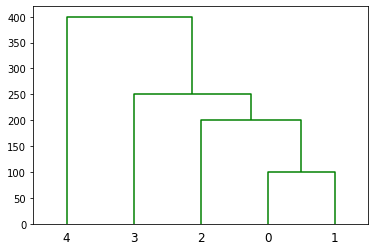

In [4]:
# Create an array
x = np.array([100., 200., 300., 400., 500., 250.,
              450., 280., 450., 750.])
 
# Plot the hierarchical clustering as a dendrogram.
temp = hierarchy.linkage(x, 'single')
plt.figure()
 
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7)

In [8]:
# Create an array
dataset = ["Dog", "is", "eating", "carrot", "."]
x = np.array(dataset)
# x = np.array([100., 200., 300., 400., 500., 250.,
#               450., 280., 450., 750.])
 
# Plot the hierarchical clustering as a dendrogram.
temp = hierarchy.linkage(x, 'single')
plt.figure()
 
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7)

ValueError: could not convert string to float: 'Dog'